# Beer Consumption São Paulo
Dataset source: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

> "The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with period of one year."

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [6]:
df["Data"] = pd.to_datetime(df["Data"], format="%Y-%m-%d")
cols_to_fix = ["Temperatura Media (C)", 
               "Temperatura Minima (C)",
               "Temperatura Maxima (C)", 
               "Precipitacao (mm)"]
for col in cols_to_fix:
    df[col] = (df[col]
               .astype(str)
               .str.replace(",", ".", regex=False)
               .astype(float))

In [7]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [8]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


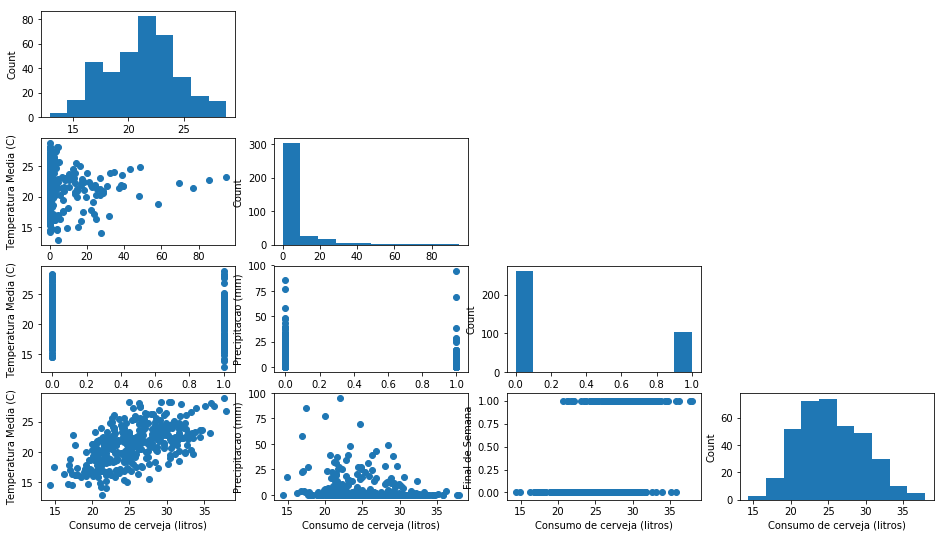

In [38]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
%matplotlib inline

names = ["Temperatura Media (C)", 
         "Precipitacao (mm)", 
         "Final de Semana", 
         "Consumo de cerveja (litros)"]

scatterplotmatrix(df[names].values, 
                  figsize=(16, 9),
                  names=names);

In [40]:
df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


## Preliminary findings
- Temperature and beer consumption are moderately positive correlated (~0.6)
- Weekends and beer consumption are moderately positive correlated (~0.5)
- Precipitation and beer consumption are weakly negative correlated (~0.2)

# Prophet

Experimenting with Prophet to forecast beer consumption (univariate)

In [9]:
from fbprophet import Prophet

prophet_df = (df[["Data", "Consumo de cerveja (litros)"]]
              .copy()
              .rename(columns={"Data": "ds",
                               "Consumo de cerveja (litros)": "y"}))
prophet_df.head()

,ds,y
0,2015-01-01,25.461
1,2015-01-02,28.972
2,2015-01-03,30.814
3,2015-01-04,29.799
4,2015-01-05,28.900


In [10]:
prophet_df.describe()

,y
count,365.000000
mean,25.401367
std,4.399143
min,14.343000
25%,22.008000
50%,24.867000
75%,28.631000
max,37.937000


In [11]:
prophet_df["floor"] = 0
prophet_df["cap"] = 50

In [12]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [22]:
prophet_df

,ds,y,floor,cap
0,2015-01-01,25.461,0,50
1,2015-01-02,28.972,0,50
2,2015-01-03,30.814,0,50
3,2015-01-04,29.799,0,50
4,2015-01-05,28.900,0,50
...,...,...,...,...
360,2015-12-27,32.307,0,50
361,2015-12-28,26.095,0,50
362,2015-12-29,22.309,0,50
363,2015-12-30,20.467,0,50


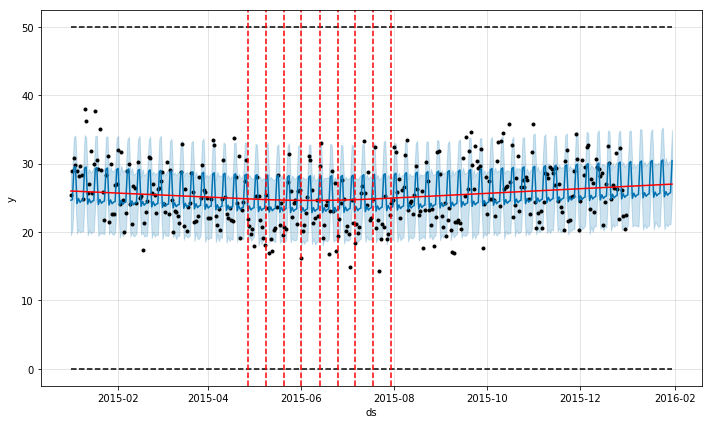

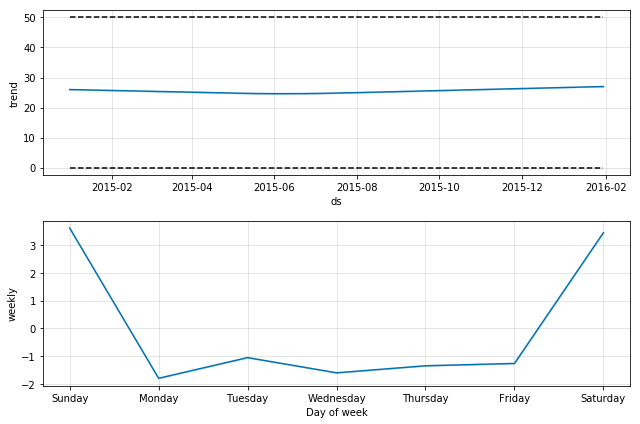

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-08-03 00:00:00 and 2015-11-01 00:00:00


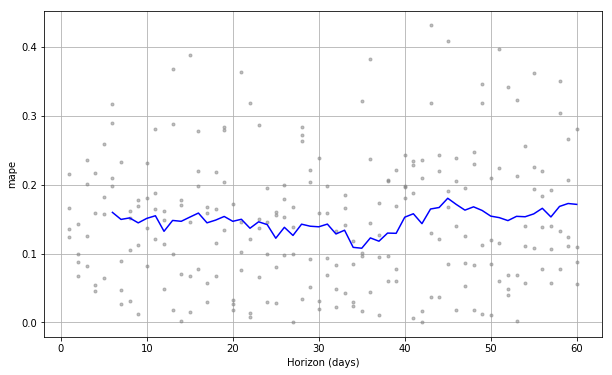

mape: 14.78%


In [37]:
m = Prophet(growth="logistic",
            daily_seasonality=False,
            weekly_seasonality=True,
            yearly_seasonality=False,
            )
m.fit(prophet_df)

future = m.make_future_dataframe(periods=30, freq='D')
future['floor'] = 0
future['cap'] = 50

forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.show()
fig2 = m.plot_components(forecast)
plt.show()
df_cv = cross_validation(m, initial='210 days', horizon='60 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

In [12]:
m = Prophet(growth="logistic",
            daily_seasonality=False,
            weekly_seasonality=True,
            yearly_seasonality=True,
            seasonality_mode="additive")
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [13]:
future = m.make_future_dataframe(periods=90, freq="D")
future['floor'] = 0
future['cap'] = 50
forecast = m.predict(future)

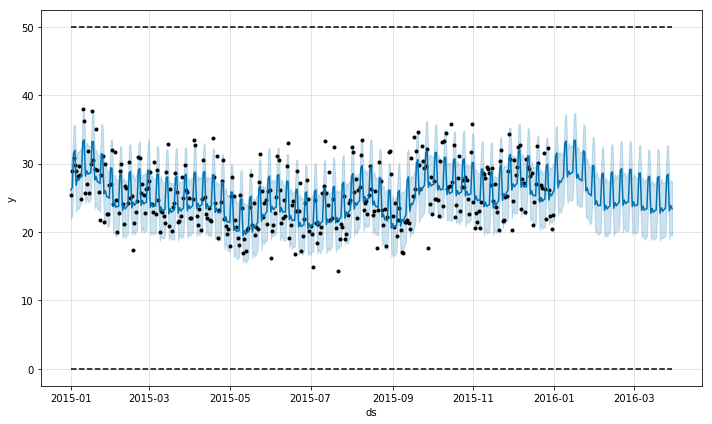

In [13]:
fig = m.plot(forecast)

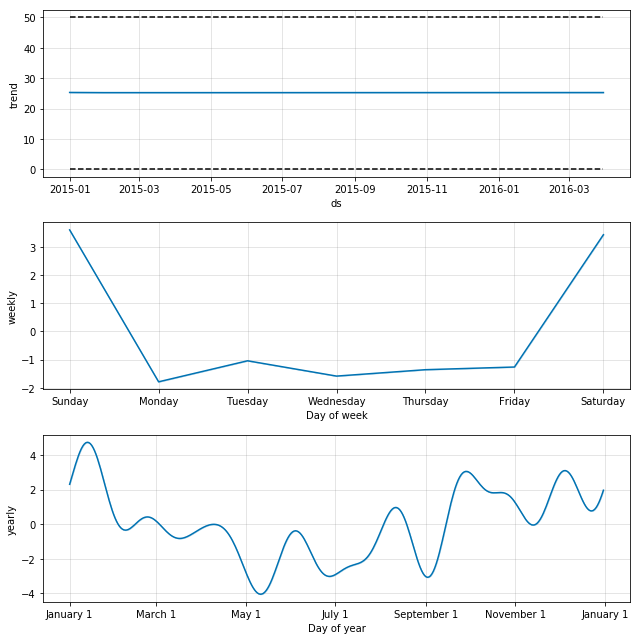

In [14]:
fig_components = m.plot_components(forecast)

## SARIMA

Inspired by: https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459

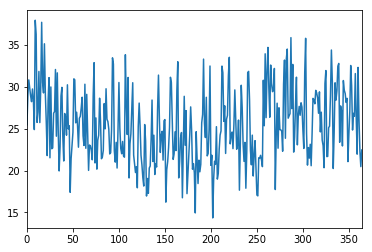

In [15]:
prophet_df["y"].plot()

## Augmented Dickey-Fuller test
Let's verify if the data is stationary

In [16]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(prophet_df["y"])

In [17]:
pvalue

0.00890772887403709

The *p-value*<0.05, we reject the null hypothesis, so the data is stationary 

We can proceed with modeling

### SARIMA parameters

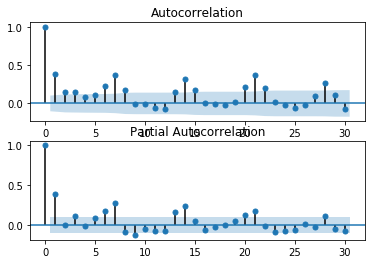

In [19]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(prophet_df["y"], lags=30, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(prophet_df["y"], lags=30, ax=ax[1])
plt.show()

- There are significant positive spikes in the ACF plot at lag 1 and lag 7 (weekly seasonal component)

- The decay is quite fast, as seem in the PACF (not much lag)

Starting parameters:
- p and P both equal 1 (significant positive spikes in ACF and PACF plots)
- d and D both equal 1 (first difference and seasonal difference)
- q and Q both equal 0 (no significant negative spikes, PACF decay is fast)
- s equal to 7 (weekly seasonal component)

Optimization terminated successfully.
         Current function value: 2.872657
         Iterations: 2
         Function evaluations: 72


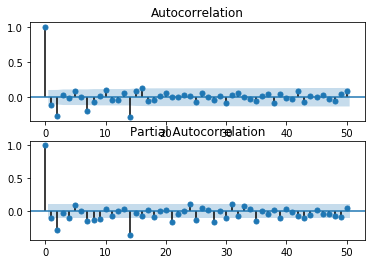

In [74]:
model = (sm.tsa.statespace.SARIMAX(prophet_df["y"], 
                                  order=(1, 1, 0), 
                                  seasonal_order=(1, 1, 0, 7))
         .fit(max_iter=50, method='powell'))

res = model.resid

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

## Grid Search computing the Akaike's Information Criterion (AIC)

Lower AIC indicates a more preditive model

In [76]:
import itertools
#set parameter range
p = range(0,3)
q = range(1,3)
d = range(1,2)
s = range(7,8)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(prophet_df["y"],
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 2.626253
         Iterations: 3
         Function evaluations: 127
SARIMA(0, 1, 1),(0, 1, 1, 7) - AIC:1923.1643260706023
Optimization terminated successfully.
         Current function value: 2.623607
         Iterations: 3
         Function evaluations: 150
SARIMA(0, 1, 1),(0, 1, 2, 7) - AIC:1923.2331313112109
Optimization terminated successfully.
         Current function value: 2.623822
         Iterations: 4
         Function evaluations: 201
SARIMA(0, 1, 1),(1, 1, 1, 7) - AIC:1923.390186150807
Optimization terminated successfully.
         Current function value: 2.625624
         Iterations: 3
         Function evaluations: 196
SARIMA(0, 1, 1),(1, 1, 2, 7) - AIC:1926.7055402167352
Optimization terminated successfully.
         Current function value: 2.623163
         Iterations: 4
         Function evaluations: 247
SARIMA(0, 1, 1),(2, 1, 1, 7) - AIC:1924.9091769237243
Optimization terminated successfully.
   

Best score: SARIMA(1, 1, 1),(0, 1, 1, 7) - AIC:1915.8207397403185

Optimization terminated successfully.
         Current function value: 2.613453
         Iterations: 4
         Function evaluations: 199


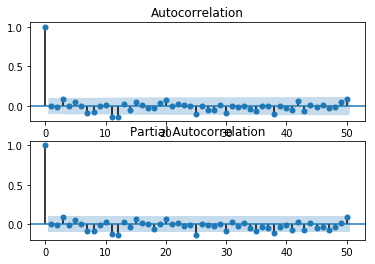

In [20]:
model = (sm.tsa.statespace.SARIMAX(prophet_df["y"], 
                                  order=(1, 1, 1), 
                                  seasonal_order=(0, 1, 1, 7))
         .fit(max_iter=50, method='powell'))

res = model.resid

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

Our residuals plot really looks better

In [102]:
# data = entire dataset
# n_test = point where data is split into training and test sets
def walk_forward_validation(data, n_test):
    predictions = np.array([])
    mape_list = []
    train, test = data[:n_test], data[n_test:]
    day_list = [7,14,21,28] # weeks 1,2,3,4
    for i in day_list:
        # Fit model to training data
        model = sm.tsa.statespace.SARIMAX(train, order=(1, 1, 1), 
                                          seasonal_order=(0, 1, 1, 7)).fit(max_iter = 50, method = 'powell')
        
        # Forecast daily loads for week i
        forecast = model.forecast(steps = 7)
        predictions = np.concatenate((predictions, forecast), axis=None)
        # Calculate MAPE and add to mape_list
        j = i-7
        mape_score = (abs(test[j:i]-predictions[j:i])/test[j:i])*100
        mape_mean = mape_score.mean()
        mape_list.append(mape_mean)
        # Add week i to training data for next loop
        train = np.concatenate((train, test[j:i]), axis=None)
        
    return predictions, mape_list

In [104]:
predictions, mape_list = walk_forward_validation(prophet_df["y"], 292)

Optimization terminated successfully.
         Current function value: 2.606417
         Iterations: 5
         Function evaluations: 252
Optimization terminated successfully.
         Current function value: 2.609945
         Iterations: 5
         Function evaluations: 252
Optimization terminated successfully.
         Current function value: 2.621078
         Iterations: 5
         Function evaluations: 243
Optimization terminated successfully.
         Current function value: 2.619624
         Iterations: 5
         Function evaluations: 250


In [106]:
print("MAPE: {} %".format(np.mean(mape_list)))

MAPE: 12.493853716898201 %


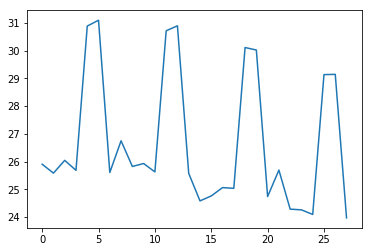

In [109]:
plt.plot(predictions)

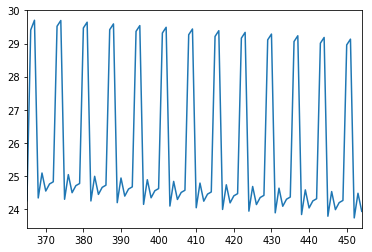

In [91]:
model.forecast(90).plot()

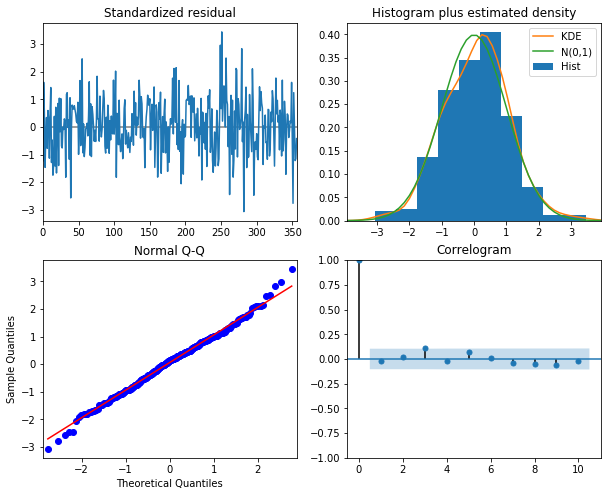

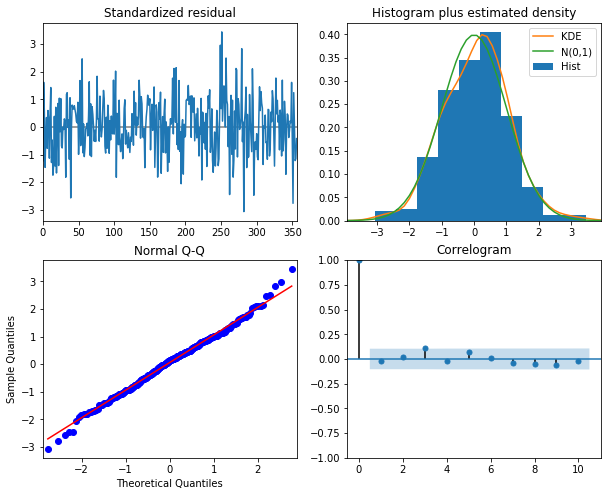

In [119]:
model.plot_diagnostics(figsize=(10, 8))

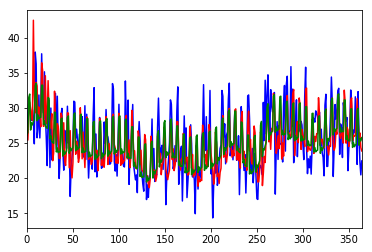

In [147]:
prophet_df["y"].plot(color='b')
model.predict()[1:].plot(color='r')
forecast[:365]["yhat"].plot(color='g')
plt.show()

## Adding exogenous variables

In [21]:
model2 = (sm.tsa.statespace.SARIMAX(prophet_df["y"], 
                                    exog=df["Temperatura Maxima (C)"].values,
                                    order=(1, 1, 1), 
                                    seasonal_order=(0, 1, 1, 7))
         .fit(max_iter=50, method='powell'))

Optimization terminated successfully.
         Current function value: 2.296791
         Iterations: 4
         Function evaluations: 240


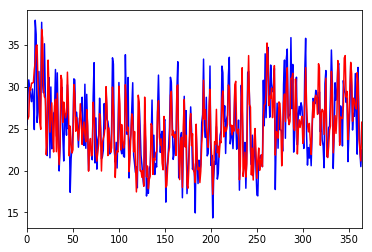

In [22]:
prophet_df["y"].plot(color='b')
model2.predict()[1:].plot(color='r')
# forecast[:365]["yhat"].plot(color='g')
plt.show()

In [17]:
prophet_df["temp"] = list(df["Temperatura Maxima (C)"])

In [18]:
prophet_df[:365-90]

,ds,y,floor,cap,temp
0,2015-01-01,25.461,0,50,32.5
1,2015-01-02,28.972,0,50,33.5
2,2015-01-03,30.814,0,50,29.9
3,2015-01-04,29.799,0,50,28.6
4,2015-01-05,28.900,0,50,28.3
...,...,...,...,...,...
270,2015-09-28,17.731,0,50,23.6
271,2015-09-29,24.114,0,50,27.1
272,2015-09-30,28.034,0,50,27.6
273,2015-10-01,22.664,0,50,26.4


In [19]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

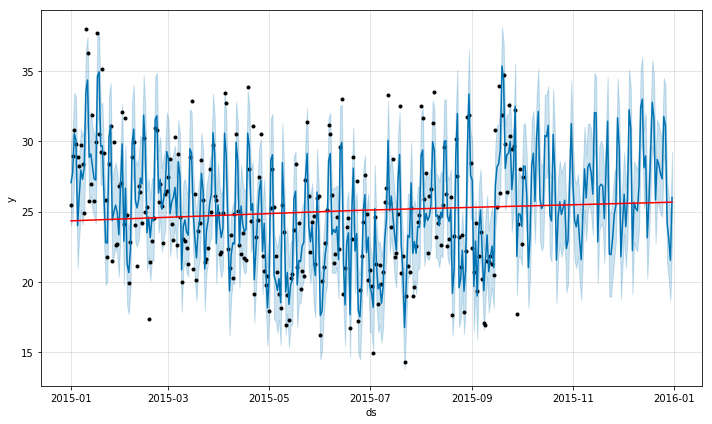

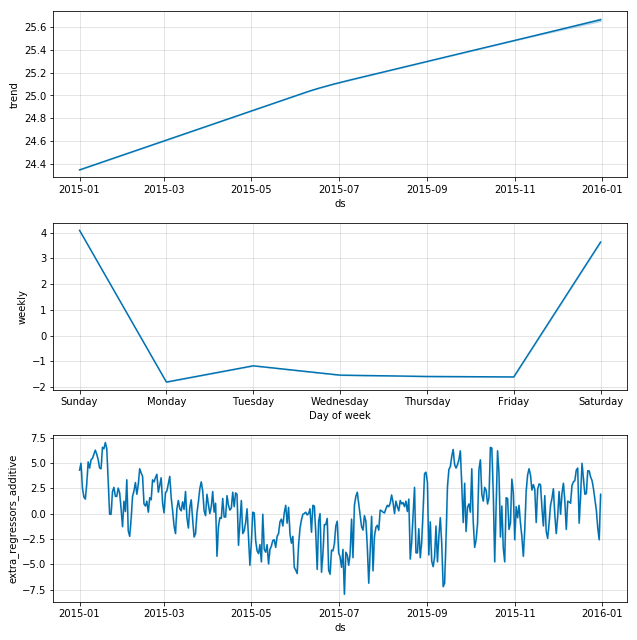

INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-07-20 00:00:00 and 2015-07-20 00:00:00


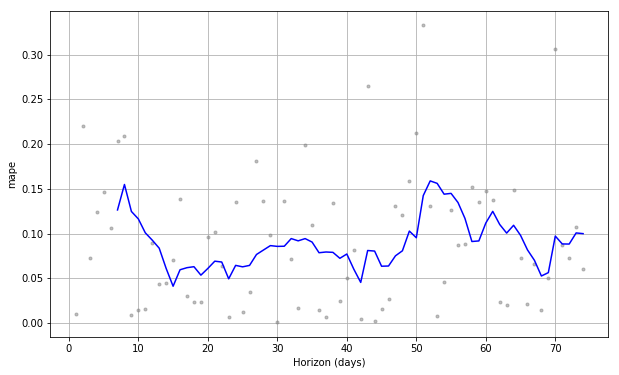

mape: 8.93%


In [23]:
m = Prophet(growth='linear',
                  yearly_seasonality=False,
                  weekly_seasonality=True,
                  daily_seasonality=False,
                  seasonality_mode='additive'
                 )

m.add_regressor('temp')

m.fit(prophet_df[:365-90])
future = m.make_future_dataframe(periods=90, freq='D')

future['temp'] = prophet_df["temp"]

forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.show()
fig2 = m.plot_components(forecast)
plt.show()
df_cv = cross_validation(m, initial='200 days', period='30 days', horizon = '74 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))